In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Reading the dataset:

In [4]:
df = pd.read_csv("DOCTOR.csv")

print(df.head(15))

# Complete information about the columns of the dataset such as column name, count, data type and overall memory usage:

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


# Total no. of patient according to count of their illness and on basis of gender :

In [10]:
df["illness"].value_counts()

illness
1    1638
0    1554
2     946
3     542
4     274
5     236
Name: count, dtype: int64

In [12]:
df["gender"].value_counts()

gender
female    2702
male      2488
Name: count, dtype: int64

# Visualise and analyse the maximum, minimum and medium income :

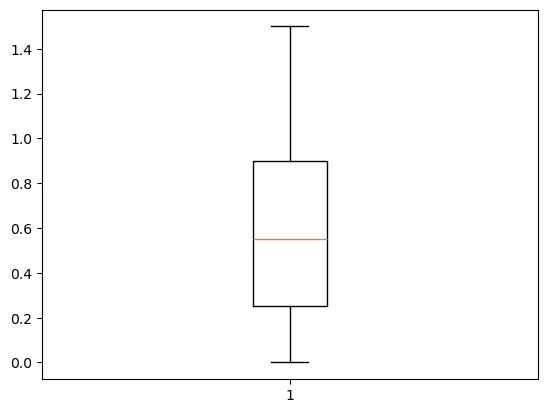

In [14]:
y = list(df.income)
plt.boxplot(y)
plt.show()

# No. of days of reduced activity of male and female seperatly due to illness:

In [64]:
df.groupby('gender')['reduced'].mean()

gender
female    0.975574
male      0.738344
Name: reduced, dtype: float64

# Visualise missing values in the dataset based on heatmap:

<Axes: >

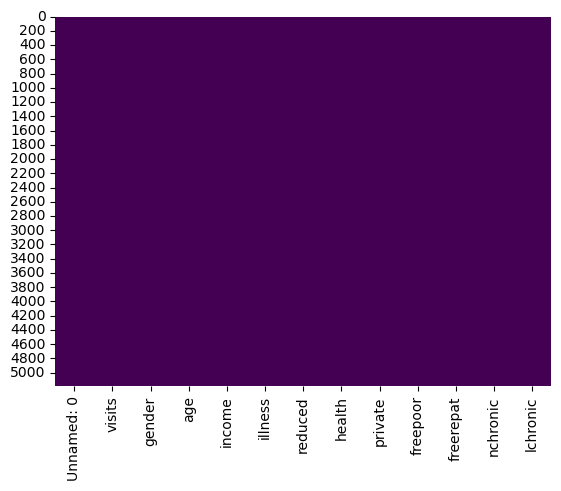

In [50]:
#missing values
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

# Analyse of how income of a patient affects the no. of visits to the hospital :

Text(0, 0.5, 'visits')

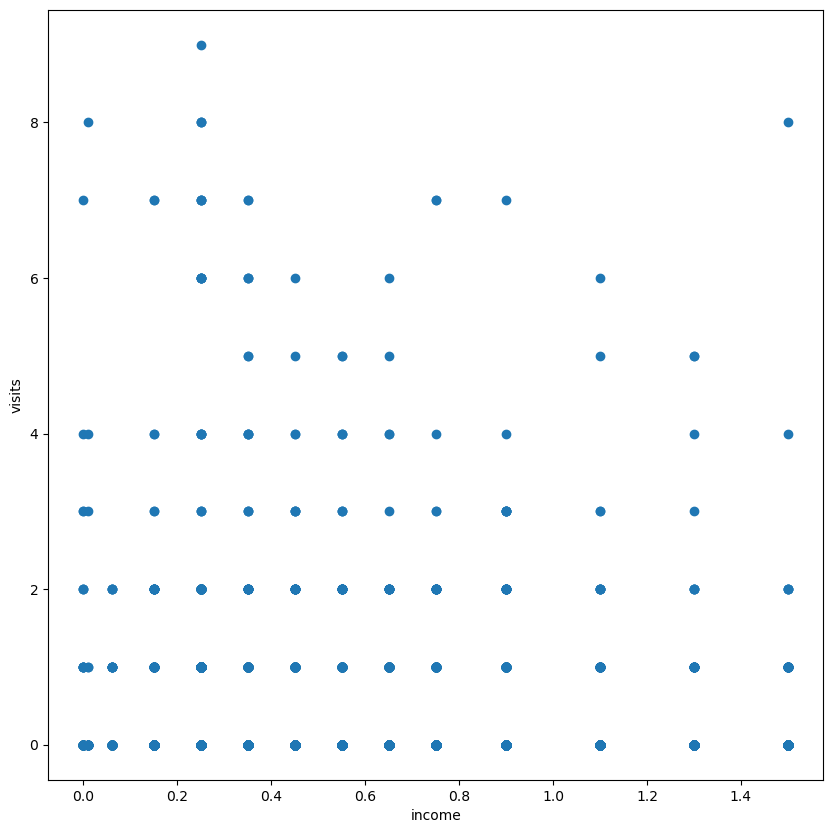

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(x='income',y='visits',data=df)
plt.xlabel('income')
plt.ylabel('visits')

# Count and visualise the number of males and female affected by illness :

<Axes: xlabel='gender', ylabel='Count'>

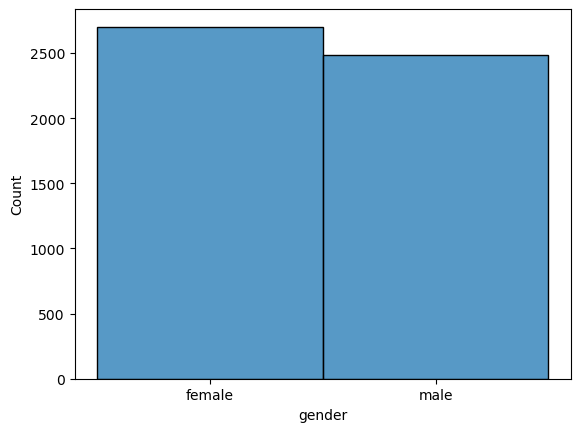

In [26]:
sns.histplot(df.gender,bins=2)

# Visualise the % of patient getting govt health insurance due to low income, due to old age and also the % of patient having private health insurance :

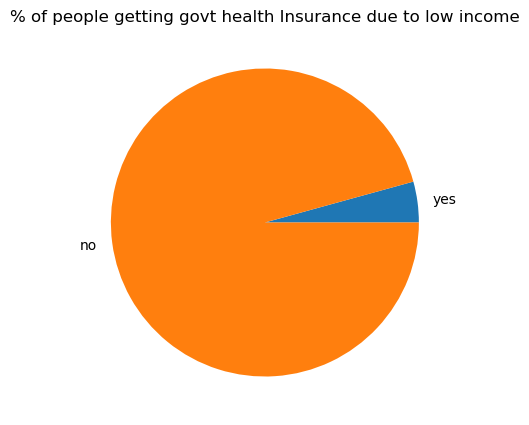

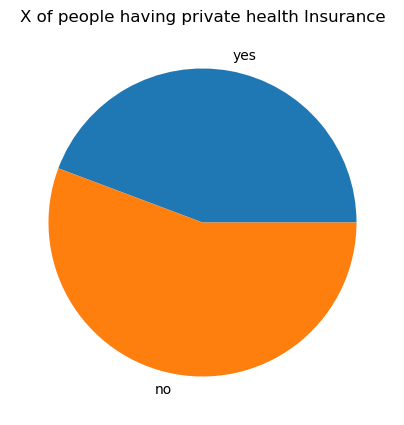

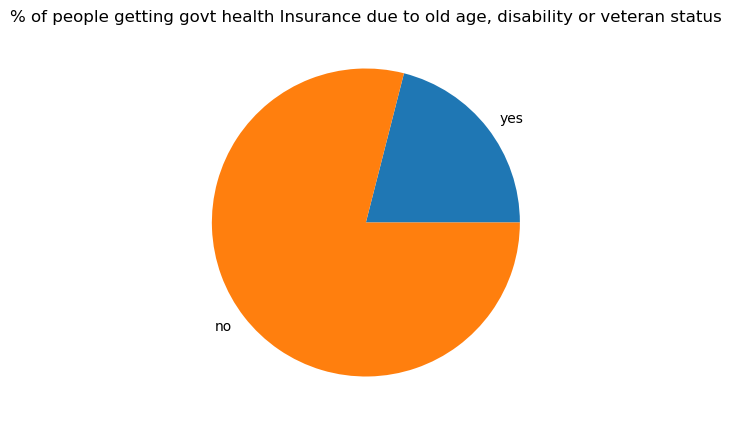

In [30]:
# X% of people getting govt Insurance due to low income
label=['yes','no']
Y = df[df[ "freepoor"]=='yes']
N = df[df[ "freepoor"]=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% of people getting govt health Insurance due to low income")
plt.show()
# X% of people having private Insurance
Y = df[df['private']=='yes']
N = df[df['private']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("X of people having private health Insurance")
plt.show()
# % of people getting govt Insurance due to old age, disability or veteran status
Y = df[df["freerepat"]=='yes']
N = df[df["freerepat"]=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% of people getting govt health Insurance due to old age, disability or veteran status")
plt.show()

# Plot of a horizontal bar chart to analyse the reduced days of activity due to illness based on gender : 

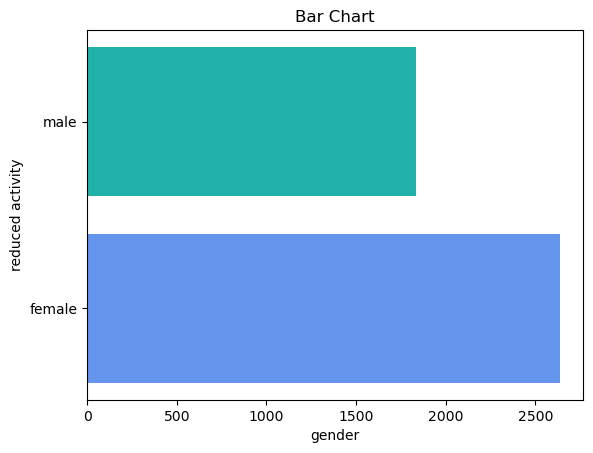

In [32]:
db= df.groupby('gender')['reduced'].sum().to_frame().reset_index()
#Creating the bar chart
plt.barh(db['gender'],db['reduced'],color=['cornflowerblue','lightseagreen'])
#Adding the aesthetics 
plt.title('Bar Chart')
plt.xlabel('gender')
plt.ylabel('reduced activity')
#Show the plot 
plt.show()